In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_data=pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.csv')

In [ ]:
for col in train_data.columns:
  na_vals=train_data[col].isna().sum()
  print("Nunber of Nan Values in "+col+":",na_vals)

Nunber of Nan Values in PRODUCT_ID: 0
Nunber of Nan Values in TITLE: 12
Nunber of Nan Values in BULLET_POINTS: 837364
Nunber of Nan Values in DESCRIPTION: 1157381
Nunber of Nan Values in PRODUCT_TYPE_ID: 0
Nunber of Nan Values in PRODUCT_LENGTH: 0


In [ ]:
train_data_columns = train_data.columns
print(train_data_columns)

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')


In [ ]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000,7.661988
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000,5.975589
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,6.617445
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,6.668738
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000,6.394300


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

target_column = 'PRODUCT_LENGTH'
target_values = train_data[target_column]

logs = np.log(target_values)
logs_clipped = logs.clip(None, 12)

train_data['PRODUCT_LENGTH_log']=logs_clipped
print(train_data.head())

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

In [ ]:
train_data.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
count,2.249698e+06,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03,6.554978e+00
std,8.661944e+05,3.966146e+03,1.351685e+06,9.718824e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02,6.237955e+00
50%,1.499558e+06,2.916000e+03,6.630000e+02,6.496775e+00
75%,2.250664e+06,6.403000e+03,1.062992e+03,6.968843e+00
max,2.999999e+06,1.342000e+04,1.885801e+09,1.200000e+01


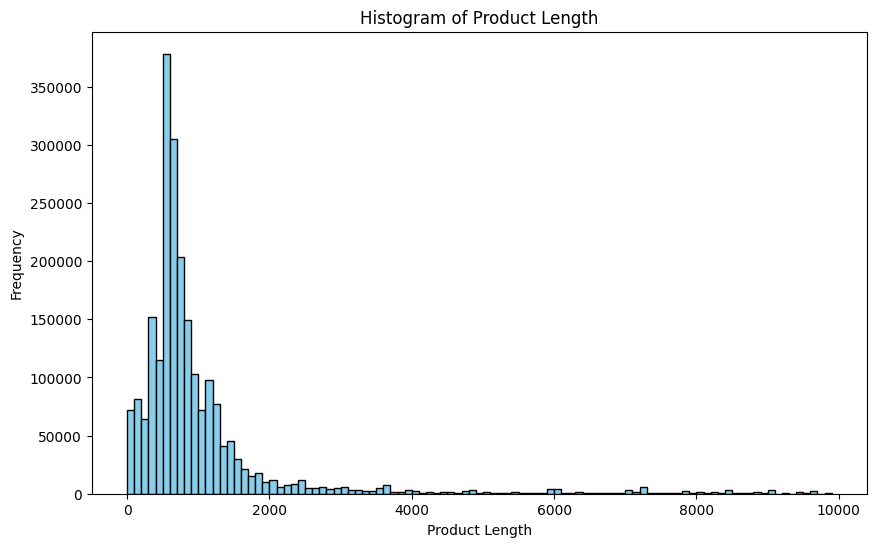

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
bin_width = 100
bins = range(0, 10000, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(train_data['PRODUCT_LENGTH'], bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Product Length")
plt.ylabel("Frequency")
plt.title("Histogram of Product Length")
plt.show()

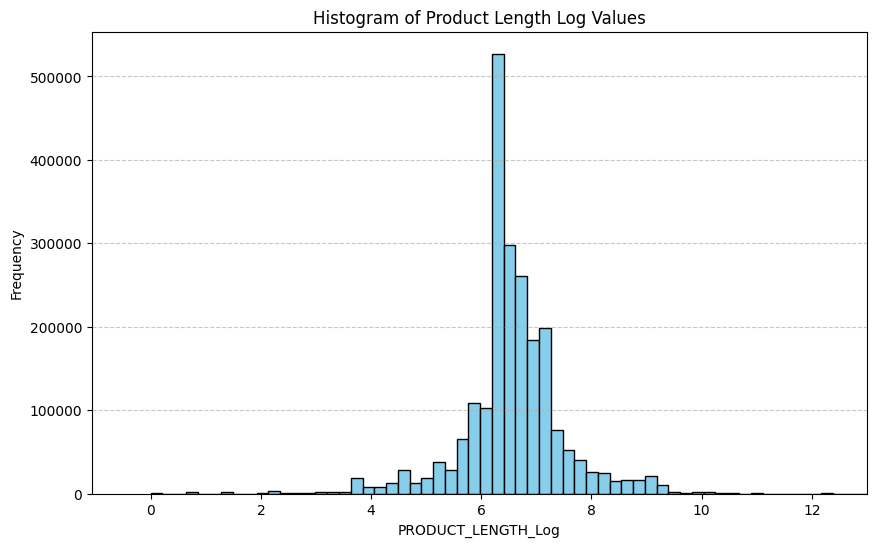

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(logs, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Length Log Values')
plt.xlabel('PRODUCT_LENGTH_Log')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(right=13)
plt.show()


In [ ]:
train_data_subset1 = train_data.head(500000).copy()

In [ ]:
train_data_subset2 = train_data.iloc[500000:600000]
train_data_subset2.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
500000,1273981,BTween Big Girls Pleated Dress with Pearl Neck...,"[Pleated chiffon skirt,Back zipper,Detachable ...",NaN,2738,1090.0,6.993933
500001,355053,Devil in Winter (Wallflower),NaN,NaN,3385,675.0,6.514713
500002,576577,Ashrae Greenguide: An Ashrae Publication Addre...,NaN,NaN,140,825.0,6.715383
500003,949762,"Nostalgic Warehouse Rope Keyhole Cover, Oil-Ru...","[Made of solid forged brass,Measuring 2&#x2033...",A classic rope border makes this oval keyhole ...,10200,200.0,5.298317
500004,1720924,Christmas Red Plaid Faux Fur Lighted House 6 i...,[Brighten up your home with this festive home ...,RAZ Imports is a wholesale importer of Seasona...,8490,400.0,5.991465


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Text Preprocessing
import pandas as pd
from nltk.corpus import stopwords
import string
train_data_real = train_data_subset1.dropna(subset=['TITLE'])

# Combine needed fields into a single column
train_data_real['combined_text'] = train_data_real['TITLE'].astype(str) + ' ' + \
                             train_data_real['BULLET_POINTS'].astype(str) + ' ' + \
                             train_data_real['DESCRIPTION'].astype(str)
#preprocessing text function
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

train_data_real['tokens'] = train_data_real['combined_text'].apply(preprocess_text)

<ipython-input-63-42c86c740e39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['combined_text'] = train_data_real['TITLE'].astype(str) + ' ' + \
<ipython-input-63-42c86c740e39>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['tokens'] = train_data_real['combined_text'].apply(preprocess_text)


In [ ]:
#word2vec
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
# Train Word2Vec model
model = Word2Vec(sentences=train_data_real['tokens'], vector_size=100, window=5, min_count=1, workers=4)
model.save('/content/drive/MyDrive/word2vec_model')



<ipython-input-17-7d9c03acfd0d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['combined_text'] = train_data_real['TITLE'].astype(str) + ' ' + \
<ipython-input-17-7d9c03acfd0d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['tokens'] = train_data_real['combined_text'].apply(preprocess_text)


In [ ]:
train_data_real.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_mm_scaled,PRODUCT_LENGTH_std_scaled,PRODUCT_LENGTH_log
count,4.999960e+05,499996.000000,4.999960e+05,499996.000000,499996.000000,499996.000000
mean,1.499523e+06,4006.510450,2.993784e+03,0.546155,-0.001155,6.553855
std,8.663265e+05,3965.655484,3.434605e+05,0.081188,1.002442,0.974256
min,1.000000e+00,0.000000,1.000000e+00,0.000000,-6.744620,0.000000
25%,7.491480e+05,241.750000,5.118110e+02,0.519830,-0.326194,6.237955
50%,1.500205e+06,2916.000000,6.600000e+02,0.541020,-0.064553,6.492240
75%,2.250725e+06,6426.000000,1.062992e+03,0.580737,0.425839,6.968843
max,2.999994e+06,13420.000000,1.774080e+08,1.000000,5.602553,12.000000


In [ ]:
train_data_real.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_mm_scaled,PRODUCT_LENGTH_std_scaled,PRODUCT_LENGTH_log,combined_text,tokens
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000,0.638499,1.139038,7.661988,ArtzFolio Tulip Flowers Blackout Curtain for D...,"[artzfolio, tulip, flowers, blackout, curtain,..."
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000,0.497966,-0.596151,5.975589,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[marks, spencer, girls, pyjama, sets, tcnavy, ..."
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,0.551454,0.064275,6.617445,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[priknik, horn, red, electric, air, horn, comp..."
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,0.555728,0.117052,6.668738,ALISHAH Women's Cotton Ankle Length Leggings C...,"[alishah, womens, cotton, ankle, length, leggi..."
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000,0.532858,-0.165327,6.394300,The United Empire Loyalists: A Chronicle of th...,"[united, empire, loyalists, chronicle, great, ..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from gensim.models import Word2Vec

word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

train_data_real['doc_embeddings'] = train_data_real['tokens'].apply(get_document_embedding)

features = np.vstack(train_data_real['doc_embeddings'].to_numpy())
target = train_data_real['PRODUCT_LENGTH_log']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

model.save('/content/drive/MyDrive/shallow_ann_word2vec_model.h5')

<ipython-input-17-7a1c1e236c72>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['doc_embeddings'] = train_data_real['tokens'].apply(get_document_embedding)


Epoch 1/50
10000/10000 [==============================] - 27s 3ms/step - loss: 1.0667 - val_loss: 0.7469
Epoch 2/50
10000/10000 [==============================] - 24s 2ms/step - loss: 0.7259 - val_loss: 0.7226
Epoch 3/50
10000/10000 [==============================] - 28s 3ms/step - loss: 0.7038 - val_loss: 0.7128
Epoch 4/50
10000/10000 [==============================] - 24s 2ms/step - loss: 0.6909 - val_loss: 0.7362
Epoch 5/50
10000/10000 [==============================] - 27s 3ms/step - loss: 0.6828 - val_loss: 0.6948
Epoch 6/50
10000/10000 [==============================] - 26s 3ms/step - loss: 0.6764 - val_loss: 0.6912
Epoch 7/50
10000/10000 [==============================] - 26s 3ms/step - loss: 0.6718 - val_loss: 0.6971
Epoch 8/50
10000/10000 [==============================] - 26s 3ms/step - loss: 0.6676 - val_loss: 0.6832
Epoch 9/50
10000/10000 [==============================] - 28s 3ms/step - loss: 0.6653 - val_loss: 0.6854
Epoch 10/50
10000/10000 [==============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd

test_data=pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

In [ ]:
test_data_new=test_data.head(1000).copy()

In [ ]:
test_data_new.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID
count,1.000000e+03,1000.00000
mean,1.473628e+06,3897.29200
std,8.765063e+05,3826.16166
min,1.180000e+02,0.00000
25%,7.419510e+05,242.75000
50%,1.412688e+06,2913.50000
75%,2.254196e+06,6228.75000
max,2.999545e+06,13343.00000


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

test_data_new['combined_text'] = test_data_new['TITLE'].astype(str) + ' ' + \
                             test_data_new['BULLET_POINTS'].astype(str) + ' ' + \
                             test_data_new['DESCRIPTION'].astype(str)

test_data_new['tokens'] = test_data_new['combined_text'].apply(preprocess_text)
test_data_new['doc_embeddings'] = test_data_new['tokens'].apply(get_document_embedding)
X_test_predict = np.vstack(test_data_new['doc_embeddings'].to_numpy())

scaler = StandardScaler()
X_test_predict_scaled = scaler.fit_transform(X_test_predict)
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/shallow_ann_word2vec_model.h5')

predictions_test = loaded_model.predict(X_test_predict_scaled)

original_predictions = np.exp(predictions_test)
test_data_new['original_predictions'] = original_predictions
test_data_new.to_csv('/content/drive/MyDrive/Dataset/test_predictions.csv', index=False)


32/32 [==============================] - 0s 2ms/step


In [ ]:
test_data_new.head(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,combined_text,tokens,doc_embeddings,predicted_PRODUCT_LENGTH_log,original_predictions
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142,Manuel d'Héliogravure Et de Photogravure En Re...,"[manuel, dhéliogravure, et, de, photogravure, ...","[-1.9609613, 2.6037092, 1.1994623, -0.6160808,...",6.399127,601.320129
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,"[dcgaring, microfiber, throw, blanket, warm, f...","[0.98820513, -0.91617626, -0.54379034, 0.07609...",9.657194,15633.856445
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,I-Match Auto Parts Front License Plate Bracket...,"[imatch, auto, parts, front, license, plate, b...","[1.1364356, 0.6460237, 1.1453304, 0.7167141, -...",6.480033,651.992432
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,PinMart Gold Plated Excellence in Service 1 Ye...,"[pinmart, gold, plated, excellence, service, y...","[0.5580996, 0.6259546, 1.3410001, 1.0940669, -...",3.819463,45.579746
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318,"Visual Mathematics, Illustrated by the TI-92 a...","[visual, mathematics, illustrated, ti, ti, nan...","[-1.9645004, 1.4004053, 0.5234233, 0.5192441, ...",6.664610,784.157898
5,2782548,Evershine Shoppee 10m Waxed Nylon Thread Cotto...,[Kindly Refer The Product Description Before B...,Description: Material: Nylon Length: about 10m...,11205,Evershine Shoppee 10m Waxed Nylon Thread Cotto...,"[evershine, shoppee, waxed, nylon, thread, cot...","[0.90450317, 0.8197726, 0.3988985, 0.40598202,...",5.999906,403.390656
6,1605901,"Vasque Men's Velocity at Hiking Shoe, Dark Spr...",[The velocity all-terrain is a streamlined hik...,NaN,3234,"Vasque Men's Velocity at Hiking Shoe, Dark Spr...","[vasque, mens, velocity, hiking, shoe, dark, s...","[0.62500453, -0.52089953, 0.66387653, 1.202323...",7.178164,1310.499268
7,938007,Pokemon M-037 Kyurem Figure Monster Collection...,NaN,NaN,0,Pokemon M-037 Kyurem Figure Monster Collection...,"[pokemon, kyurem, figure, monster, collection,...","[-1.5331917, 0.90837127, 0.25712368, 0.3818643...",6.314397,552.468750
8,708128,Ganz normal verrückt: Das Wassermannzeitalter ...,NaN,NaN,10512,Ganz normal verrückt: Das Wassermannzeitalter ...,"[ganz, normal, verrückt, das, wassermannzeital...","[-1.4257922, 1.1899076, 0.82804656, -0.5146963...",6.029330,415.436676
9,1609597,"Lug Women's Puddle Jumper Wheelie 2, Heather Grey","[Polyester Twill,Imported,polyester lining,Sof...",NaN,2640,"Lug Women's Puddle Jumper Wheelie 2, Heather G...","[lug, womens, puddle, jumper, wheelie, heather...","[-0.5863713, 0.15078527, 0.5929154, 0.89195526...",6.684899,800.230103


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.7769721022981103


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.5837604871656142


In [ ]:
train_data_subset2=train_data_subset1.head(500).copy()
train_data_subset2.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_mm_scaled,PRODUCT_LENGTH_std_scaled,PRODUCT_LENGTH_log
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.519023e+06,4081.256000,1059.393009,0.541760,-0.055413,6.501123
std,8.831041e+05,4059.435391,1588.336127,0.082400,1.017411,0.988804
min,1.871600e+04,0.000000,10.000000,0.191882,-4.375419,2.302585
25%,7.329788e+05,228.750000,500.000000,0.517884,-0.350217,6.214608
50%,1.514788e+06,2879.000000,649.605649,0.539697,-0.080886,6.476365
75%,2.293266e+06,6548.000000,1023.622046,0.577592,0.387007,6.931103
max,2.999397e+06,13121.000000,19685.000000,0.823968,3.429051,9.887612


In [ ]:

import pandas as pd
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

train_data_real1 = train_data_subset2.dropna(subset=['TITLE'])

train_data_real1['combined_text'] = train_data_real1['TITLE'].astype(str) + ' ' + \
                             train_data_real1['BULLET_POINTS'].astype(str) + ' ' + \
                             train_data_real1['DESCRIPTION'].astype(str)

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    processed_text = ' '.join(tokens)
    return processed_text


train_data_real1['tokens'] = train_data_real1['combined_text'].apply(preprocess_text)



In [ ]:
train_data_real1.head()

NameError: ignored

In [ ]:
train_data_real1.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_mm_scaled,PRODUCT_LENGTH_std_scaled,PRODUCT_LENGTH_log
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.519023e+06,4081.256000,1059.393009,0.541760,-0.055413,6.501123
std,8.831041e+05,4059.435391,1588.336127,0.082400,1.017411,0.988804
min,1.871600e+04,0.000000,10.000000,0.191882,-4.375419,2.302585
25%,7.329788e+05,228.750000,500.000000,0.517884,-0.350217,6.214608
50%,1.514788e+06,2879.000000,649.605649,0.539697,-0.080886,6.476365
75%,2.293266e+06,6548.000000,1023.622046,0.577592,0.387007,6.931103
max,2.999397e+06,13121.000000,19685.000000,0.823968,3.429051,9.887612


In [ ]:
import numpy as np
import tensorflow as tf
from transformers import RobertaTokenizer, TFRobertaModel
from google.colab import drive

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


def generate_roberta_embeddings(text):

    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=True)

    input_ids = np.array(tokens)

    input_ids = tf.expand_dims(input_ids, 0)

    embeddings = roberta_model(input_ids)['last_hidden_state']

    return embeddings

train_data_real1['roberta_embeddings'] = train_data_real1['tokens'].apply(generate_roberta_embeddings)


max_sequence_length = 151
X_train_roberta = tf.keras.preprocessing.sequence.pad_sequences(train_data_real1['roberta_embeddings'].tolist(), maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')


roberta_model_fun = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_sequence_length, 768)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

roberta_model_fun.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

y_train_roberta = train_data_real1['label'].to_numpy()

roberta_model_fun.fit(X_train_roberta, y_train_roberta, epochs=5)

roberta_model_fun.save('/content/drive/MyDrive/roberta_model_fun')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
test_data_new_ext=train_data_subset1.tail(100000).copy()
test_data_new_ext.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000
mean,1.502580e+06,3999.527510,2.275113e+03,6.551785
std,8.667110e+05,3965.628006,9.922037e+04,0.973717
min,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,7.506918e+05,231.000000,5.100000e+02,6.234411
50%,1.505348e+06,2916.000000,6.500000e+02,6.476972
75%,2.258042e+06,6411.250000,1.062992e+03,6.968843
max,2.999964e+06,13419.000000,1.685036e+07,12.000000


In [ ]:
test_data_new_ext.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
400000,483164,The Easy Thyroid Diet Plan: A 28-Day Meal Plan...,NaN,NaN,77,750.000000,6.620073
400001,883733,Speed of Life,NaN,NaN,804,500.000000,6.214608
400002,2037171,EYZUTAK Case for iPhone 12/iPhone 12 Pro 6.1 i...,[Compatible Model: Specially Design for iPhone...,<b>Key Features: </b><br> - Made of durable an...,12058,590.550000,6.381054
400003,1111178,MeasuPro Multi-Purpose Wide Range Non-Contact ...,[WIDE RANGE FDA approved thermometer safely me...,NaN,0,326.771653,5.789262
400004,2499612,PremiumWallArts Vertical Garden Artifical Mat ...,[QUANTITY: 5 Pieces; SIZE: 50cm X 50cm x 8cm; ...,PremiumWallArts Artificial Small Leaves Vertic...,1591,1929.133856,7.564826


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
# Load the Word2Vec model
word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

test_data_new_ext['combined_text'] = test_data_new_ext['TITLE'].astype(str) + ' ' + \
                             test_data_new_ext['BULLET_POINTS'].astype(str) + ' ' + \
                             test_data_new_ext['DESCRIPTION'].astype(str)

test_data_new_ext['tokens'] = test_data_new_ext['combined_text'].apply(preprocess_text)

test_data_new_ext['doc_embeddings'] = test_data_new_ext['tokens'].apply(get_document_embedding)

X_test_predict = np.vstack(test_data_new_ext['doc_embeddings'].to_numpy())

scaler = StandardScaler()

X_test_predict_scaled = scaler.fit_transform(X_test_predict)

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/shallow_ann_word2vec_model.h5')

predictions_test = loaded_model.predict(X_test_predict_scaled)

original_predictions = np.exp(predictions_test)
test_data_new_ext['original_predictions'] = original_predictions
test_data_new_ext.to_csv('/content/drive/MyDrive/Dataset/test_predictions.csv', index=False)


3125/3125 [==============================] - 6s 2ms/step


In [ ]:
test_data_new_ext.tail()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions
499995,162251,Robin Hood – The Forresters Manuscript (Britis...,NaN,NaN,114,614.000000,6.419995,Robin Hood – The Forresters Manuscript (Britis...,"[robin, hood, forresters, manuscript, british,...","[-1.2068994, 1.0594772, 0.3936004, -0.26738974...",746.743774
499996,2658703,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,[GlassUp is HD Clear and Easy to install Glass...,GlassUp Tempered Glass Straight Edge Screen Pr...,2211,748.031495,6.617445,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,"[glassuppack, eye, protective, anti, glare, ma...","[1.2289124, -0.18660045, 0.5720804, 1.7652249,...",384.076935
499997,2835220,Samcase Colorful Pattern Printed Soft Designer...,[Material : Premium Class Silicone Back Cover....,Y Today’s lifestyle is incomplete without cell...,12064,314.960630,5.752448,Samcase Colorful Pattern Printed Soft Designer...,"[samcase, colorful, pattern, printed, soft, de...","[1.095453, 0.2569122, 1.0485541, 0.8353922, -1...",321.646393
499998,2327579,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,[MATERIAL: This Custom fit casual Full sleeves...,This cotton button down shirt is not only comf...,2851,472.440944,6.157913,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,"[one, centre, rum, mens, casual, shirt, stripe...","[1.126525, -0.053288963, -0.24312285, -0.95844...",847.310608
499999,2384578,"Bird Feeders for Outdoors Hanging, Beautiful P...",[We strive to improve products to solve proble...,"Feature:<br>1. Powerful suction cups, 3 super ...",7010,39.370079,3.673006,"Bird Feeders for Outdoors Hanging, Beautiful P...","[bird, feeders, outdoors, hanging, beautiful, ...","[1.2031955, -0.27884075, -0.21431904, 0.910369...",699.065613


In [ ]:
test_data_new_ext['Error']=(abs(test_data_new_ext['original_predictions'] - test_data_new_ext['PRODUCT_LENGTH'])/test_data_new_ext['PRODUCT_LENGTH'])*100
test_data_new_ext.tail(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions,Accuracy,Error
499990,1215695,"Edge of Belgravia Single Kitchen Knife, Premiu...",NaN,The 15 cm filleting knife is the supreme tool ...,1469,1225.984251,7.111499,"Edge of Belgravia Single Kitchen Knife, Premiu...","[edge, belgravia, single, kitchen, knife, prem...","[0.445817, -0.15607883, 0.83130276, 1.417913, ...",598.134155,51.211922,51.211922
499991,389986,101 Kindle Photo Book Ideas: Simple Self-Publi...,NaN,NaN,6117,598.000000,6.393591,101 Kindle Photo Book Ideas: Simple Self-Publi...,"[kindle, photo, book, ideas, simple, selfpubli...","[-0.72903967, 0.9568502, 0.37617603, 0.7596901...",1286.554810,115.142945,115.142945
499992,1385806,Homecoming Dress Short Prom Dresses Lace Cockt...,"[Features:A-Line ,Knee Length Style;Sleeveless...",Cdress Women's beaded sew on lace appliques bo...,2986,590.551180,6.381056,Homecoming Dress Short Prom Dresses Lace Cockt...,"[homecoming, dress, short, prom, dresses, lace...","[0.35122183, 0.2633431, 0.95659995, -0.2956322...",546.390686,7.477844,7.477844
499993,720777,Projektcontrolling in Theorie und Praxis. Ziel...,NaN,NaN,6046,583.000000,6.368187,Projektcontrolling in Theorie und Praxis. Ziel...,"[projektcontrolling, theorie, und, praxis, zie...","[-1.4239959, 0.68008924, 0.7847188, -0.4844953...",530.051208,9.082125,9.082125
499994,1396768,PUMA BMW Motorsport Low Cut Shoes,Team Blue-Puma White,BMW MS MCH Lo,3251,1003.937007,6.911685,PUMA BMW Motorsport Low Cut Shoes Team Blue-Pu...,"[puma, bmw, motorsport, low, cut, shoes, team,...","[0.13257287, 0.8768102, 0.695893, -0.405199, 0...",1411.898926,40.636207,40.636207
499995,162251,Robin Hood – The Forresters Manuscript (Britis...,NaN,NaN,114,614.000000,6.419995,Robin Hood – The Forresters Manuscript (Britis...,"[robin, hood, forresters, manuscript, british,...","[-1.2068994, 1.0594772, 0.3936004, -0.26738974...",746.743774,21.619507,21.619507
499996,2658703,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,[GlassUp is HD Clear and Easy to install Glass...,GlassUp Tempered Glass Straight Edge Screen Pr...,2211,748.031495,6.617445,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,"[glassuppack, eye, protective, anti, glare, ma...","[1.2289124, -0.18660045, 0.5720804, 1.7652249,...",384.076935,48.654978,48.654978
499997,2835220,Samcase Colorful Pattern Printed Soft Designer...,[Material : Premium Class Silicone Back Cover....,Y Today’s lifestyle is incomplete without cell...,12064,314.960630,5.752448,Samcase Colorful Pattern Printed Soft Designer...,"[samcase, colorful, pattern, printed, soft, de...","[1.095453, 0.2569122, 1.0485541, 0.8353922, -1...",321.646393,2.122730,2.122730
499998,2327579,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,[MATERIAL: This Custom fit casual Full sleeves...,This cotton button down shirt is not only comf...,2851,472.440944,6.157913,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,"[one, centre, rum, mens, casual, shirt, stripe...","[1.126525, -0.053288963, -0.24312285, -0.95844...",847.310608,79.347412,79.347412
499999,2384578,"Bird Feeders for Outdoors Hanging, Beautiful P...",[We strive to improve products to solve proble...,"Feature:<br>1. Powerful suction cups, 3 super ...",7010,39.370079,3.673006,"Bird Feeders for Outdoors Hanging, Beautiful P...","[bird, feeders, outdoors, hanging, beautiful, ...","[1.2031955, -0.27884075, -0.21431904, 0.910369...",699.065613,1675.626658,1675.626658


In [ ]:
errorvaluess = test_data_new_ext[test_data_new_ext['Error'] < 100]['Error']

errorval = errorvaluess.mean()
acc1=100-errorval
print(f'Error of values : {errorval}')
print(f'Accuracy of values: {acc1}')


Error of values : 29.91625473248112
Accuracy of values: 70.08374526751888


In [ ]:
train_data_subset2 = train_data.iloc[500000:600000]
train_data_subset2.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
500000,1273981,BTween Big Girls Pleated Dress with Pearl Neck...,"[Pleated chiffon skirt,Back zipper,Detachable ...",NaN,2738,1090.0,6.993933
500001,355053,Devil in Winter (Wallflower),NaN,NaN,3385,675.0,6.514713
500002,576577,Ashrae Greenguide: An Ashrae Publication Addre...,NaN,NaN,140,825.0,6.715383
500003,949762,"Nostalgic Warehouse Rope Keyhole Cover, Oil-Ru...","[Made of solid forged brass,Measuring 2&#x2033...",A classic rope border makes this oval keyhole ...,10200,200.0,5.298317
500004,1720924,Christmas Red Plaid Faux Fur Lighted House 6 i...,[Brighten up your home with this festive home ...,RAZ Imports is a wholesale importer of Seasona...,8490,400.0,5.991465


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
# Load the Word2Vec model
word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

train_data_subset2['combined_text'] = train_data_subset2['TITLE'].astype(str) + ' ' + \
                             train_data_subset2['BULLET_POINTS'].astype(str) + ' ' + \
                             train_data_subset2['DESCRIPTION'].astype(str)

train_data_subset2['tokens'] = train_data_subset2['combined_text'].apply(preprocess_text)

train_data_subset2['doc_embeddings'] = train_data_subset2['tokens'].apply(get_document_embedding)

X_test_predict = np.vstack(train_data_subset2['doc_embeddings'].to_numpy())

scaler = StandardScaler()

X_test_predict_scaled = scaler.fit_transform(X_test_predict)

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/shallow_ann_word2vec_model.h5')

predictions_test = loaded_model.predict(X_test_predict_scaled)

original_predictions = np.exp(predictions_test)
train_data_subset2['original_predictions'] = original_predictions
train_data_subset2.to_csv('/content/drive/MyDrive/Dataset/test_predictions2.csv', index=False)


<ipython-input-43-ce66e4bcb0c2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_subset2['combined_text'] = train_data_subset2['TITLE'].astype(str) + ' ' + \
<ipython-input-43-ce66e4bcb0c2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_subset2['tokens'] = train_data_subset2['combined_text'].apply(preprocess_text)
<ipython-input-43-ce66e4bcb0c2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

3125/3125 [==============================] - 5s 2ms/step


<ipython-input-43-ce66e4bcb0c2>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_subset2['original_predictions'] = original_predictions


In [ ]:
train_data_subset2.tail()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions
599995,367718,The Paralegal: Second Edition: 1,NaN,NaN,12743,600.000,6.396930,The Paralegal: Second Edition: 1 nan nan,"[paralegal, second, edition, nan, nan]","[-2.00224, 1.3441805, 0.6166608, 0.57161456, 0...",821.948792
599996,86808,A Discourse of Matters Pertaining to Religion,NaN,NaN,6104,614.172,6.420275,A Discourse of Matters Pertaining to Religion ...,"[discourse, matters, pertaining, religion, nan...","[-1.0177566, 0.79974955, 0.23011541, -0.518376...",655.675720
599997,280649,Orpheus Sive Panharmonion: Litterae Saeculares...,NaN,NaN,123,744.000,6.612041,Orpheus Sive Panharmonion: Litterae Saeculares...,"[orpheus, sive, panharmonion, litterae, saecul...","[-0.9062883, 1.138462, 0.57047564, 0.1757967, ...",566.744507
599998,1551001,Myra Bag Bumblebee Upcycled Canvas & Cowhide L...,NaN,NaN,9208,2250.000,7.718685,Myra Bag Bumblebee Upcycled Canvas & Cowhide L...,"[myra, bag, bumblebee, upcycled, canvas, cowhi...","[0.02769739, 0.03884851, 1.9193019, 1.8160278,...",1294.536255
599999,784278,Time on My Hands,NaN,NaN,794,550.000,6.309918,Time on My Hands nan nan,"[time, hands, nan, nan]","[-0.48704755, 0.9833133, -1.2072732, 1.8062147...",486.922089


In [ ]:
train_data_subset2['Error']=(abs(train_data_subset2['original_predictions'] - train_data_subset2['PRODUCT_LENGTH'])/train_data_subset2['PRODUCT_LENGTH'])*100
train_data_subset2.tail(10)

<ipython-input-49-3f425ccde28c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_subset2['Error']=(abs(train_data_subset2['original_predictions'] - train_data_subset2['PRODUCT_LENGTH'])/train_data_subset2['PRODUCT_LENGTH'])*100


,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions,Error
599990,1022088,Mustad 2286TD Classic Gaff Barbless Duratin Ho...,"[Wide gap, same size as comparable standard tr...",NaN,4360,100.000000,4.605170,Mustad 2286TD Classic Gaff Barbless Duratin Ho...,"[mustad, td, classic, gaff, barbless, duratin,...","[0.872158, 0.10618681, -0.3042641, 0.74473345,...",355.823547,255.823547
599991,1330500,AHS Lighting 4SD1565-05CD Set of 4 Bone Linen ...,"[Made in USA,Handcrafted design,Replacement la...",NaN,1669,1200.000000,7.090077,AHS Lighting 4SD1565-05CD Set of 4 Bone Linen ...,"[ahs, lighting, sdcd, set, bone, linen, drumsh...","[0.08359129, 0.02804442, 0.8588279, 1.5863407,...",1294.064819,7.838735
599992,2576789,Divine Handicraft Printed Birthday Gifts for B...,"[Ideal for Coffee, Tea, Milk, Soup any other b...",Divine Handicrat registered Brand. Divine Hand...,1396,314.960000,5.752446,Divine Handicraft Printed Birthday Gifts for B...,"[divine, handicraft, printed, birthday, gifts,...","[1.614137, 0.19718425, 0.5222796, 0.94548094, ...",525.800903,66.942121
599993,1762200,Diesel DL0274 54 05A Men Sunglasses,NaN,NaN,2861,1181.100000,7.074201,Diesel DL0274 54 05A Men Sunglasses nan nan,"[diesel, dl, men, sunglasses, nan, nan]","[-0.75061375, 1.6147528, 0.5747404, 0.6561876,...",516.442017,56.274488
599994,2118522,KEVIL Toys Metal 1:32 Die Cast Model Compatibl...,[✓ Made of Fine Metal : The material used in t...,✓KEVIL Toy Present :-✓ 1: 32 scale die cast al...,12916,393.700787,5.975591,KEVIL Toys Metal 1:32 Die Cast Model Compatibl...,"[kevil, toys, metal, die, cast, model, compati...","[0.98200047, 0.593837, 0.6820663, 1.2514124, -...",432.765564,9.922453
599995,367718,The Paralegal: Second Edition: 1,NaN,NaN,12743,600.000000,6.396930,The Paralegal: Second Edition: 1 nan nan,"[paralegal, second, edition, nan, nan]","[-2.00224, 1.3441805, 0.6166608, 0.57161456, 0...",821.948792,36.991465
599996,86808,A Discourse of Matters Pertaining to Religion,NaN,NaN,6104,614.172000,6.420275,A Discourse of Matters Pertaining to Religion ...,"[discourse, matters, pertaining, religion, nan...","[-1.0177566, 0.79974955, 0.23011541, -0.518376...",655.675720,6.757671
599997,280649,Orpheus Sive Panharmonion: Litterae Saeculares...,NaN,NaN,123,744.000000,6.612041,Orpheus Sive Panharmonion: Litterae Saeculares...,"[orpheus, sive, panharmonion, litterae, saecul...","[-0.9062883, 1.138462, 0.57047564, 0.1757967, ...",566.744507,23.824663
599998,1551001,Myra Bag Bumblebee Upcycled Canvas & Cowhide L...,NaN,NaN,9208,2250.000000,7.718685,Myra Bag Bumblebee Upcycled Canvas & Cowhide L...,"[myra, bag, bumblebee, upcycled, canvas, cowhi...","[0.02769739, 0.03884851, 1.9193019, 1.8160278,...",1294.536255,42.465055
599999,784278,Time on My Hands,NaN,NaN,794,550.000000,6.309918,Time on My Hands nan nan,"[time, hands, nan, nan]","[-0.48704755, 0.9833133, -1.2072732, 1.8062147...",486.922089,11.468711


In [ ]:
errorvaluess2 = train_data_subset2[train_data_subset2['Error'] < 100]['Error']

errorval2 = errorvaluess2.mean()
acc2=100-errorval2
print(f'Error of values : {errorval2}')
print(f'Accuracy of values: {acc2}')


Error of values : 30.2070744893559
Accuracy of values: 69.7929255106441


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from gensim.models import Word2Vec

# Load the Word2Vec model
word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

train_data_real['doc_embeddings'] = train_data_real['tokens'].apply(get_document_embedding)

features = np.vstack(train_data_real['doc_embeddings'].to_numpy())
target = train_data_real['PRODUCT_LENGTH_log']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

predictions = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

import joblib
joblib.dump(linear_model, '/content/drive/MyDrive/linear_regression_word2vec_model.pkl')

<ipython-input-64-c2e1e98b478c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_real['doc_embeddings'] = train_data_real['tokens'].apply(get_document_embedding)


Mean Squared Error on Test Set: 0.7769721193679969


['/content/drive/MyDrive/linear_regression_word2vec_model.pkl']

In [ ]:
test_data_new2=train_data_subset1.tail(100000).copy()
test_data_new2.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000
mean,1.502580e+06,3999.527510,2.275113e+03,6.551785
std,8.667110e+05,3965.628006,9.922037e+04,0.973717
min,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,7.506918e+05,231.000000,5.100000e+02,6.234411
50%,1.505348e+06,2916.000000,6.500000e+02,6.476972
75%,2.258042e+06,6411.250000,1.062992e+03,6.968843
max,2.999964e+06,13419.000000,1.685036e+07,12.000000


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

test_data_new2['combined_text'] = test_data_new2['TITLE'].astype(str) + ' ' + \
                             test_data_new2['BULLET_POINTS'].astype(str) + ' ' + \
                             test_data_new2['DESCRIPTION'].astype(str)

test_data_new2['tokens'] = test_data_new2['combined_text'].apply(preprocess_text)

test_data_new2['doc_embeddings'] = test_data_new2['tokens'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))

features = np.vstack(test_data_new2['doc_embeddings'].to_numpy())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

linear_model = LinearRegression()
linear_model = joblib.load('/content/drive/MyDrive/linear_regression_word2vec_model.pkl')

regressor_test = linear_model.predict(features_scaled)

original_predictions = np.exp(regressor_test)
test_data_new2['original_predictions'] = original_predictions
# test_data_new2.to_csv('/content/drive/MyDrive/Dataset/test_predictions2.csv', index=False)


In [ ]:
regressor_test = linear_model.predict(features_scaled)
original_predictions = np.exp(regressor_test)
test_data_new2['original_predictions'] = original_predictions

In [ ]:
test_data_new2['Error']=(abs(test_data_new2['original_predictions'] - test_data_new2['PRODUCT_LENGTH'])/test_data_new2['PRODUCT_LENGTH'])*100
errorvaluess2 = test_data_new2[test_data_new2['Error'] < 100]['Error']
test_data_new2.tail(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions,Error
499990,1215695,"Edge of Belgravia Single Kitchen Knife, Premiu...",NaN,The 15 cm filleting knife is the supreme tool ...,1469,1225.984251,7.111499,"Edge of Belgravia Single Kitchen Knife, Premiu...","[edge, belgravia, single, kitchen, knife, prem...","[0.445817, -0.15607883, 0.83130276, 1.417913, ...",494.421661,59.671451
499991,389986,101 Kindle Photo Book Ideas: Simple Self-Publi...,NaN,NaN,6117,598.000000,6.393591,101 Kindle Photo Book Ideas: Simple Self-Publi...,"[kindle, photo, book, ideas, simple, selfpubli...","[-0.72903967, 0.9568502, 0.37617603, 0.7596901...",764.521912,27.846474
499992,1385806,Homecoming Dress Short Prom Dresses Lace Cockt...,"[Features:A-Line ,Knee Length Style;Sleeveless...",Cdress Women's beaded sew on lace appliques bo...,2986,590.551180,6.381056,Homecoming Dress Short Prom Dresses Lace Cockt...,"[homecoming, dress, short, prom, dresses, lace...","[0.35122183, 0.2633431, 0.95659995, -0.2956322...",788.109192,33.453157
499993,720777,Projektcontrolling in Theorie und Praxis. Ziel...,NaN,NaN,6046,583.000000,6.368187,Projektcontrolling in Theorie und Praxis. Ziel...,"[projektcontrolling, theorie, und, praxis, zie...","[-1.4239959, 0.68008924, 0.7847188, -0.4844953...",754.228760,29.370285
499994,1396768,PUMA BMW Motorsport Low Cut Shoes,Team Blue-Puma White,BMW MS MCH Lo,3251,1003.937007,6.911685,PUMA BMW Motorsport Low Cut Shoes Team Blue-Pu...,"[puma, bmw, motorsport, low, cut, shoes, team,...","[0.13257287, 0.8768102, 0.695893, -0.405199, 0...",920.288818,8.332016
499995,162251,Robin Hood – The Forresters Manuscript (Britis...,NaN,NaN,114,614.000000,6.419995,Robin Hood – The Forresters Manuscript (Britis...,"[robin, hood, forresters, manuscript, british,...","[-1.2068994, 1.0594772, 0.3936004, -0.26738974...",712.075500,15.973209
499996,2658703,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,[GlassUp is HD Clear and Easy to install Glass...,GlassUp Tempered Glass Straight Edge Screen Pr...,2211,748.031495,6.617445,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,"[glassuppack, eye, protective, anti, glare, ma...","[1.2289124, -0.18660045, 0.5720804, 1.7652249,...",502.313263,32.848648
499997,2835220,Samcase Colorful Pattern Printed Soft Designer...,[Material : Premium Class Silicone Back Cover....,Y Today’s lifestyle is incomplete without cell...,12064,314.960630,5.752448,Samcase Colorful Pattern Printed Soft Designer...,"[samcase, colorful, pattern, printed, soft, de...","[1.095453, 0.2569122, 1.0485541, 0.8353922, -1...",450.007812,42.877481
499998,2327579,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,[MATERIAL: This Custom fit casual Full sleeves...,This cotton button down shirt is not only comf...,2851,472.440944,6.157913,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,"[one, centre, rum, mens, casual, shirt, stripe...","[1.126525, -0.053288963, -0.24312285, -0.95844...",798.906372,69.101849
499999,2384578,"Bird Feeders for Outdoors Hanging, Beautiful P...",[We strive to improve products to solve proble...,"Feature:<br>1. Powerful suction cups, 3 super ...",7010,39.370079,3.673006,"Bird Feeders for Outdoors Hanging, Beautiful P...","[bird, feeders, outdoors, hanging, beautiful, ...","[1.2031955, -0.27884075, -0.21431904, 0.910369...",690.580994,1654.075726


In [ ]:
errorval2 = errorvaluess2.mean()
acc2=100-errorval2
print(f'Error of values : {errorval2}')
print(f'Accuracy of values: {acc2}')


Error of values : 32.13777526118367
Accuracy of values: 67.86222473881634


In [ ]:
test_linear = train_data.iloc[500000:600000]
test_linear.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log
500000,1273981,BTween Big Girls Pleated Dress with Pearl Neck...,"[Pleated chiffon skirt,Back zipper,Detachable ...",NaN,2738,1090.0,6.993933
500001,355053,Devil in Winter (Wallflower),NaN,NaN,3385,675.0,6.514713
500002,576577,Ashrae Greenguide: An Ashrae Publication Addre...,NaN,NaN,140,825.0,6.715383
500003,949762,"Nostalgic Warehouse Rope Keyhole Cover, Oil-Ru...","[Made of solid forged brass,Measuring 2&#x2033...",A classic rope border makes this oval keyhole ...,10200,200.0,5.298317
500004,1720924,Christmas Red Plaid Faux Fur Lighted House 6 i...,[Brighten up your home with this festive home ...,RAZ Imports is a wholesale importer of Seasona...,8490,400.0,5.991465


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model')

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def get_document_embedding(tokens):
    word_embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

test_linear['combined_text'] = test_linear['TITLE'].astype(str) + ' ' + \
                             test_linear['BULLET_POINTS'].astype(str) + ' ' + \
                             test_linear['DESCRIPTION'].astype(str)

test_linear['tokens'] = test_linear['combined_text'].apply(preprocess_text)

test_linear['doc_embeddings'] = test_linear['tokens'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0))

features = np.vstack(test_linear['doc_embeddings'].to_numpy())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

linear_model = LinearRegression()
linear_model = joblib.load('/content/drive/MyDrive/linear_regression_word2vec_model.pkl')

regressor_test = linear_model.predict(features_scaled)

original_predictions = np.exp(regressor_test)
test_linear['original_predictions'] = original_predictions
# test_linear.to_csv('/content/drive/MyDrive/Dataset/test_predictions2.csv', index=False)


<ipython-input-90-e47d2ddcdcdb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear['combined_text'] = test_linear['TITLE'].astype(str) + ' ' + \
<ipython-input-90-e47d2ddcdcdb>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear['tokens'] = test_linear['combined_text'].apply(preprocess_text)
<ipython-input-90-e47d2ddcdcdb>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
regressor_test = linear_model.predict(features_scaled)
original_predictions = np.exp(regressor_test)
test_linear['original_predictions'] = original_predictions

In [ ]:
test_linear['Error']=(abs(test_linear['original_predictions'] - test_linear['PRODUCT_LENGTH'])/test_linear['PRODUCT_LENGTH'])*100
errorvaluess2 = test_linear[test_linear['Error'] < 100]['Error']
test_linear.tail(10)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,PRODUCT_LENGTH_log,combined_text,tokens,doc_embeddings,original_predictions,Error
499990,1215695,"Edge of Belgravia Single Kitchen Knife, Premiu...",NaN,The 15 cm filleting knife is the supreme tool ...,1469,1225.984251,7.111499,"Edge of Belgravia Single Kitchen Knife, Premiu...","[edge, belgravia, single, kitchen, knife, prem...","[0.445817, -0.15607883, 0.83130276, 1.417913, ...",543.489990,55.669089
499991,389986,101 Kindle Photo Book Ideas: Simple Self-Publi...,NaN,NaN,6117,598.000000,6.393591,101 Kindle Photo Book Ideas: Simple Self-Publi...,"[kindle, photo, book, ideas, simple, selfpubli...","[-0.72903967, 0.9568502, 0.37617603, 0.7596901...",880.868713,47.302460
499992,1385806,Homecoming Dress Short Prom Dresses Lace Cockt...,"[Features:A-Line ,Knee Length Style;Sleeveless...",Cdress Women's beaded sew on lace appliques bo...,2986,590.551180,6.381056,Homecoming Dress Short Prom Dresses Lace Cockt...,"[homecoming, dress, short, prom, dresses, lace...","[0.35122183, 0.2633431, 0.95659995, -0.2956322...",363.168152,38.503526
499993,720777,Projektcontrolling in Theorie und Praxis. Ziel...,NaN,NaN,6046,583.000000,6.368187,Projektcontrolling in Theorie und Praxis. Ziel...,"[projektcontrolling, theorie, und, praxis, zie...","[-1.4239959, 0.68008924, 0.7847188, -0.4844953...",388.060486,33.437309
499994,1396768,PUMA BMW Motorsport Low Cut Shoes,Team Blue-Puma White,BMW MS MCH Lo,3251,1003.937007,6.911685,PUMA BMW Motorsport Low Cut Shoes Team Blue-Pu...,"[puma, bmw, motorsport, low, cut, shoes, team,...","[0.13257287, 0.8768102, 0.695893, -0.405199, 0...",554.502563,44.767196
499995,162251,Robin Hood – The Forresters Manuscript (Britis...,NaN,NaN,114,614.000000,6.419995,Robin Hood – The Forresters Manuscript (Britis...,"[robin, hood, forresters, manuscript, british,...","[-1.2068994, 1.0594772, 0.3936004, -0.26738974...",476.620636,22.374489
499996,2658703,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,[GlassUp is HD Clear and Easy to install Glass...,GlassUp Tempered Glass Straight Edge Screen Pr...,2211,748.031495,6.617445,GlassUp®[1Pack] Eye Protective Anti Glare Matt...,"[glassuppack, eye, protective, anti, glare, ma...","[1.2289124, -0.18660045, 0.5720804, 1.7652249,...",606.841125,18.874923
499997,2835220,Samcase Colorful Pattern Printed Soft Designer...,[Material : Premium Class Silicone Back Cover....,Y Today’s lifestyle is incomplete without cell...,12064,314.960630,5.752448,Samcase Colorful Pattern Printed Soft Designer...,"[samcase, colorful, pattern, printed, soft, de...","[1.095453, 0.2569122, 1.0485541, 0.8353922, -1...",581.494751,84.624584
499998,2327579,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,[MATERIAL: This Custom fit casual Full sleeves...,This cotton button down shirt is not only comf...,2851,472.440944,6.157913,ONE CENTRE Rum Men's Casual Shirt | Striped Cu...,"[one, centre, rum, mens, casual, shirt, stripe...","[1.126525, -0.053288963, -0.24312285, -0.95844...",1012.258850,114.261457
499999,2384578,"Bird Feeders for Outdoors Hanging, Beautiful P...",[We strive to improve products to solve proble...,"Feature:<br>1. Powerful suction cups, 3 super ...",7010,39.370079,3.673006,"Bird Feeders for Outdoors Hanging, Beautiful P...","[bird, feeders, outdoors, hanging, beautiful, ...","[1.2031955, -0.27884075, -0.21431904, 0.910369...",389.168945,888.489122


In [ ]:
errorval2 = errorvaluess2.mean()
acc2=100-errorval2
print(f'Error of values : {errorval2}')
print(f'Accuracy of values: {acc2}')


Error of values : 39.33149801927422
Accuracy of values: 60.66850198072578
